In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import pylab as py 
from pandas import DataFrame

In [3]:
courses = pd.read_excel(r"C:\Users\safia\OneDrive\Documents\2020 SEMESTER 2\DATA3406\ass2\DATA3406-Assignment-2\data\Cycle 4\C4Courses.xlsx")
comments = pd.read_excel(r"C:\Users\safia\OneDrive\Documents\2020 SEMESTER 2\DATA3406\ass2\DATA3406-Assignment-2\data\Cycle 4\C4Comments.xlsx")
groups = pd.read_excel(r"C:\Users\safia\OneDrive\Documents\2020 SEMESTER 2\DATA3406\ass2\DATA3406-Assignment-2\data\Cycle 4\C4UsersCourses.xlsx")
questions = pd.read_excel(r"C:\Users\safia\OneDrive\Documents\2020 SEMESTER 2\DATA3406\ass2\DATA3406-Assignment-2\data\Cycle 4\C4Questions.xlsx")

In [4]:
team_questions = questions[['user','avg_rating', 'AcademicMark', 'total_comments']].merge(groups[['user','Team']], on='user', how='inner')
question_comment = team_questions[['user', 'AcademicMark','avg_rating', 'total_comments','Team']].merge(comments, on='user', how='outer')
question_comment = question_comment.dropna()
question_comment

user  AcademicMark  avg_rating  total_comments   Team  Comment_ID  \
10    635990           5.0        3.75             2.0  Brown   7202419.0   
11    635990           5.0        3.75             2.0  Brown   7202425.0   
12    635990           5.0        3.75             2.0  Brown   7202447.0   
13    635990           5.0        3.75             2.0  Brown   7206134.0   
14    635990           5.0        3.75             2.0  Brown   7206140.0   
...      ...           ...         ...             ...    ...         ...   
4089  591275           4.0        4.00             0.0  White   7227252.0   
4090  591275           4.0        4.00             0.0  White   7227272.0   
4091  591275           4.0        4.00             0.0  White   7227458.0   
4092  591275           4.0        4.00             0.0  White   7227933.0   
4093  591275           4.0        4.00             0.0  White   7227935.0   

      course_id            Timestamp  Question_ID  \
10      21320.0  2020-05-03 13:28:57    4472540.0   
11      21320.0  2020-05-03 13:34:57    4472481.0   
12      21320.0  2020-05-03 13:52:47    4472418.0   
13      21320.0  2020-05-05 12:04:47    4475502.0   
14      21320.0  2020-05-05 12:11:03    4473933.0   
...         ...                  ...          ...   
4089    21328.0  2020-05-14 17:06:50    4487903.0   
4090    21328.0  2020-05-14 17:25:46    4476095.0   
4091    21328.0  2020-05-14 20:23:55    4488818.0   
4092    21328.0  2020-05-15 00:22:06    4488786.0   
4093    21328.0  2020-05-15 00:23:35    4488371.0   

                                                Comment  
10    I think this is a really good question! I thin...  
11    This question requires the students to recall ...  
12    This question requires quite specific and deta...  
13    It would be really helpful if you further expl...  
14    I think option C is quite misleading; I chose ...  
...                                                 ...  
4089  Personally, I found the answers to the questio...  
4090  Really good, thorough question with really wel...  
4091  Really well worded question and possible answe...  
4092  Really good explanations and questions, testin...  
4093  I think this is a good question - relevant to ...  

[2130 rows x 10 columns]

In [5]:
#Below is a list of key words that would make a comment actionable/useful
key_word_list = ["as a result", "consequently",
                 "for example", "furthermore","develop",
                 "in addition", "incidentally", "instead","likewise", "rather than", 
                 "rather", "therefore", "improve", "distractor", "fix"]

In [6]:
#This section of code checks whether each comment is useful and 
#creates a new coloumn with True or False values regarding the comment being useful
is_useful_comment = []
for i in question_comment['Comment']:
    useful = False
    i_lower_caps = i.lower()
    comments_in_words = i_lower_caps.split(' ')
    for key_word in key_word_list:
        if key_word in comments_in_words:
            useful = True
            is_useful_comment.append(True)
            break
    if useful == False:
        is_useful_comment.append(False)
        
question_comment['Useful_comment'] = is_useful_comment

In [9]:
grouped_useful_comments = question_comment[['avg_rating','Team','Useful_comment','AcademicMark','total_comments']].groupby('Useful_comment').mean()
grouped_useful_comments

avg_rating  AcademicMark  total_comments
Useful_comment                                          
False             3.509731       3.79521        2.785629
True              3.700935       3.95000        2.052174

In [7]:
grouped_useful_comments = question_comment[['Team','Useful_comment', 'avg_rating', 'AcademicMark','total_comments']].groupby('Team').mean().sort_values('Useful_comment', ascending = False)
grouped_useful_comments

Useful_comment  avg_rating  AcademicMark  total_comments
Team                                                            
Yellow        0.311927    3.341009      3.619266        2.701835
White         0.309942    3.992865      4.274854        2.362573
Black         0.279070    3.352481      3.573643        2.240310
Purple        0.244604    3.790935      4.079137        3.000000
Blue          0.220339    3.877585      4.042373        2.004237
Pink          0.212329    3.631575      3.859589        2.010274
Green         0.190635    3.512575      3.832776        2.307692
Brown         0.142222    3.206622      3.537778        3.826667
Red           0.102740    3.470548      3.845890        3.414384

In [8]:
grouped_useful_comments = question_comment[['Team', 'avg_rating']].groupby('Team').mean().sort_values('avg_rating', ascending = False)
grouped_useful_comments

avg_rating
Team              
White     3.992865
Blue      3.877585
Purple    3.790935
Pink      3.631575
Green     3.512575
Red       3.470548
Black     3.352481
Yellow    3.341009
Brown     3.206622

In [9]:
grouped_useful_comments = question_comment[['Team', 'AcademicMark']].groupby('Team').mean().sort_values('AcademicMark', ascending = False)
grouped_useful_comments

AcademicMark
Team                
White       4.274854
Purple      4.079137
Blue        4.042373
Pink        3.859589
Red         3.845890
Green       3.832776
Yellow      3.619266
Black       3.573643
Brown       3.537778

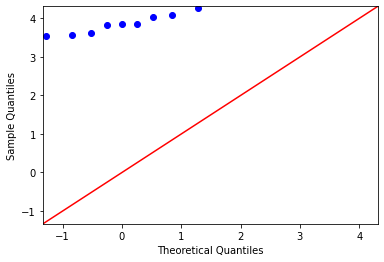

In [16]:
sm.qqplot(grouped_useful_comments['AcademicMark'], line='45') 
py.show() 

Some graph